<a href="https://colab.research.google.com/github/hdtruong802/Pytorch-Assignments/blob/main/Pytorch_Image_Processing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài tập lập trình: Thực hành lập trình hàm tiền xử lý ảnh
```
ProtonX - Pytorch Class
```

### Hướng dẫn làm bài
- Trong bài tập này bạn sẽ sử dụng Python 3.
- Sau khi bạn viết Code của mình xong, hãy chạy dòng Code đó để xem kết quả bên dưới.

### [Quan trọng] Chú ý
- **Không sử dụng hàm `input()` tại bất kỳ dòng lệnh nào**
- **Không thay đổi dòng code return của hàm**

Các bạn sẽ thực hiện `code` trong các phần hiển thị `#TODO: Lập trình tại đây` và thay thế các vị trí `None`. Có những câu hỏi chỉ cần trả về đáp án.

Sau khi viết xong Code của bạn, bạn hãy ấn "SHIFT"+"ENTER" để thực hiện chạy lệnh của Cell đó.

---
Điểm số:
* 10 điểm / Câu

Tiêu chí chấm điểm:
* Các bài tập sẽ được chấm dựa trên các Test-case.
* Các bạn không khởi tạo lại giá trị đầu vào bên trong hàm. Có thể khởi tạo các giá trị này ngoài hàm nhằm mục đích kiểm thử.

In [1]:
from typing import Any, List, Optional, Tuple, Union
from torch import Tensor

# Lập trình hàm chỉnh độ sáng của ảnh

## Ảnh ban đầu dưới dạng một PIL Image

In [2]:
!wget https://storage.googleapis.com/protonx-cdn/cat.jpeg

--2024-02-21 09:04:14--  https://storage.googleapis.com/protonx-cdn/cat.jpeg
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1155778 (1.1M) [image/jpeg]
Saving to: ‘cat.jpeg.1’

cat.jpeg.1          100%[===================>]   1.10M  2.49MB/s    in 0.4s    

2024-02-21 09:04:15 (2.49 MB/s) - ‘cat.jpeg.1’ saved [1155778/1155778]



In [3]:
from PIL import Image
import matplotlib.pyplot as plt
image_path = "/content/cat.jpeg"
image_pil = Image.open(image_path)

In [4]:
# image_pil

## Lập trình chuyển một PIL Image về Torch Tensor

Hàm `pil_to_tensor` nhận một đối tượng hình ảnh của thư viện PIL (`pic`) làm tham số đầu vào và trả về một tensor của PyTorch biểu diễn cho hình ảnh đó.

Nếu đối tượng đầu vào không phải là một PIL Image, hàm sẽ ném ra một `TypeError`. Sau đó, hàm sử dụng thư viện NumPy để chuyển đổi đối tượng PIL Image thành một mảng NumPy, và sau đó sử dụng PyTorch để tạo một tensor từ mảng NumPy đó.

Cuối cùng, hàm điều chỉnh hình dạng của tensor để phản ánh đúng chiều dài, chiều rộng và số lượng kênh của hình ảnh, và chuyển đổi từ định dạng HWC (chiều cao, chiều rộng, số kênh) sang định dạng CHW (số kênh, chiều cao, chiều rộng).

Ở đây, hàm `_is_pil_image` đã được định nghĩa trước đó để kiểm tra xem đối tượng có phải là PIL Image hay không.

In [5]:
def _is_pil_image(img: Any) -> bool:
    return isinstance(img, Image.Image)

In [6]:
def pil_to_tensor(pic: Any) -> Tensor:
    """Chuyển đổi một PIL Image thành một Pytorch Tensor.

    Tham số:
        pic (PIL Image): Hình ảnh cần chuyển đổi thành tensor.
    Trả về:
        Tensor: Hình ảnh đã chuyển đổi.
    """
    if not _is_pil_image(pic):
        raise TypeError(f"pic should be PIL Image. Got {type(pic)}")

    # TODO 1: sử dụng thư viện NumPy để chuyển đổi đối tượng PIL Image thành một mảng NumPy, và sau đó sử dụng PyTorch để tạo một tensor từ mảng NumPy đó.
    img = np.array(pic)
    if len(img.shape) == 2:
        img = img[:, :, np.newaxis]
    img = torch.tensor(img)
    # TODO 2: chuyển đổi từ định dạng HWC (chiều cao, chiều rộng, số kênh) sang định dạng CHW (số kênh, chiều cao, chiều rộng).
    img = img.permute(2, 0, 1).contiguous()
    return img

Test case

In [7]:
from PIL import Image
import torch
import numpy as np

def test_pil_to_tensor():
    # Test case 1: Valid PIL Image
    valid_pil_image = Image.new('RGB', (100, 100))
    tensor_result = pil_to_tensor(valid_pil_image)
    assert isinstance(tensor_result, torch.Tensor)
    assert tensor_result.shape == (3, 100, 100)  # RGB image, so 3 channels
    assert tensor_result.dtype == torch.uint8  # Assuming default dtype for PIL image

    # Test case 2: Valid PIL Image with a different mode
    valid_pil_image_gray = Image.new('L', (80, 60))
    tensor_result_gray = pil_to_tensor(valid_pil_image_gray)
    assert isinstance(tensor_result_gray, torch.Tensor)
    assert tensor_result_gray.shape == (1, 60, 80)  # Grayscale image, so 1 channel
    assert tensor_result_gray.dtype == torch.uint8  # Assuming default dtype for PIL image

    # Test case 3: Invalid input (not a PIL Image)
    invalid_input = np.zeros((50, 50, 3), dtype=np.uint8)
    try:
        pil_to_tensor(invalid_input)
    except TypeError as e:
        assert "pic should be PIL Image" in str(e)

    print('All test cases passed')

# Run the test cases
test_pil_to_tensor()


All test cases passed


## Lập trình hàm lấy giá trị lớn nhất của kiểu dữ liệu hiện tại

In [8]:
import torch
from typing import Any, List, Optional, Tuple, Union

In [9]:
def _is_pil_image(img: Any) -> bool:
    return isinstance(img, Image.Image)

Hàm `_max_value` này nhận vào một loại dữ liệu của PyTorch (`dtype`) làm đối số và trả về giá trị tối đa có thể biểu diễn được cho loại dữ liệu đó. Hàm này được thiết kế để xử lý các loại dữ liệu số nguyên khác nhau trong PyTorch và cung cấp giá trị tối đa có thể biểu diễn được bởi các tensor của những loại đó.

Dưới đây là mô tả của hàm:

- **Đối số đầu vào:** `dtype` là loại dữ liệu của PyTorch mà bạn muốn xác định giá trị tối đa.

- **Đầu ra:** Hàm trả về một số nguyên, đại diện cho giá trị tối đa có thể biểu diễn được bởi các tensor của loại dữ liệu được chỉ định.

Hàm sử dụng một chuỗi các câu lệnh `if` và `elif` để kiểm tra loại dữ liệu đầu vào (`dtype`) và trả về giá trị tối đa tương ứng dựa trên các loại dữ liệu số nguyên trong PyTorch. Dưới đây là ánh xạ:

- Nếu `dtype` là `torch.uint8`, hàm trả về 255.
- Nếu `dtype` là `torch.int8`, hàm trả về 127.
- Nếu `dtype` là `torch.int16`, hàm trả về 32767.
- Nếu `dtype` là `torch.int32`, hàm trả về 2147483647.
- Nếu `dtype` là `torch.int64`, hàm trả về 9223372036854775807.

Mệnh đề `else` xử lý các trường hợp khi loại dữ liệu đầu vào không phải là một trong các loại số nguyên đã được chỉ định. Trong trường hợp này, hàm trả về 1. Bình luận trong khối `else` cho biết giá trị mặc định này được cung cấp để hoàn thiện, và việc thay đổi nó có thể khó khăn do những giả định ngầm định ở nhiều nơi.

Tóm lại, hàm này là một tiện ích để lấy giá trị tối đa có thể biểu diễn được cho các loại dữ liệu số nguyên khác nhau trong PyTorch, và nó cung cấp một giá trị mặc định cho các trường hợp khác.

In [10]:
def _max_value(dtype: torch.dtype) -> int:
    # TODO 3: Lập trình như giải thích bên trên
    if dtype == torch.uint8:
      max_value = 255
    elif dtype == torch.int8:
      max_value = 127
    elif dtype == torch.int16:
      max_value = 32767
    elif dtype == torch.int32:
      max_value = 2147483647
    elif dtype == torch.int64:
      max_value = 9223372036854775807
    elif dtype == torch.float32:
      max_value = int(1.0)
    elif dtype == torch.float64:
      max_value = int(1.0)
    elif dtype == torch.bool:
      max_value = 1

    return max_value

Test case

In [11]:
import torch

def test_max_value():
    assert _max_value(torch.uint8) == 255
    assert _max_value(torch.int8) == 127
    assert _max_value(torch.int16) == 32767
    assert _max_value(torch.int32) == 2147483647
    assert _max_value(torch.int64) == 9223372036854775807
    # Add more test cases for other data types if needed
    assert _max_value(torch.float32) == 1
    assert _max_value(torch.float64) == 1
    assert _max_value(torch.bool) == 1
    print('All test cases passed')

# Run the test cases
test_max_value()


All test cases passed


**Kết quả mong đợi**

All test cases passed


In [12]:
from torch import Tensor

## II. Lập trình hàm trộn ảnh
Trộn hai ảnh với nhau theo tỉ lệ nhất định

Hàm `_blend`, nhận vào hai tensors `img1` và `img2`, cùng với một hệ số `ratio`. Hàm này thực hiện việc trộn (blend) hai ảnh với một tỷ lệ nhất định.

Dưới đây là giải thích từng bước của hàm:

1. Chuyển đổi `ratio` thành kiểu dữ liệu `float` để đảm bảo nó là số thập phân.

2. Tính giá trị giới hạn (`bound`) bằng cách gọi hàm `_max_value` với kiểu dữ liệu của `img1`. Hàm `_max_value` trả về giá trị tối đa có thể của kiểu dữ liệu đó.

3. Tính toán và trả về kết quả của việc trộn ảnh. Bước này bao gồm các bước sau:
    - Tính tổ hợp tuyến tính của hai ảnh với tỷ lệ `ratio` và `1.0 - ratio` tương ứng. Điều này tương đương với việc lấy một phần của ảnh `img1` và một phần của ảnh `img2`.
    - Giới hạn giá trị kết quả trong khoảng từ 0 đến `bound`. Điều này đảm bảo rằng giá trị của pixel sau khi trộn nằm trong phạm vi hợp lý cho kiểu dữ liệu của ảnh.
    - Chuyển đổi kiểu dữ liệu của kết quả về kiểu dữ liệu của ảnh `img1`. Điều này đảm bảo rằng đầu ra có cùng kiểu dữ liệu với đầu vào.

Tổng cộng, hàm `_blend` được thiết kế để trộn hai ảnh `img1` và `img2` theo một tỷ lệ nhất định và giữ cho giá trị của pixel trong phạm vi hợp lý.

In [13]:
def _blend(img1: Tensor, img2: Tensor, ratio: float) -> Tensor:
    # TODO 4: Lập trình như giải thích bên trên
    ratio = float(ratio)
    bound = _max_value(img1.dtype)
    out = ratio * img1 + (1.0 - ratio) * img2
    out = torch.clamp(out, 0, bound)
    out = out.to(img1.dtype)

    return out

Test code

In [14]:
import torch
import torch.testing

def test_blend():
    # Test case 1
    img1 = torch.tensor([[1, 2], [3, 4]], dtype=torch.int8)
    img2 = torch.tensor([[5, 6], [7, 8]], dtype=torch.int8)
    ratio = 0.5
    result = _blend(img1, img2, ratio)
    expected_result = torch.tensor([[3, 4], [5, 6]], dtype=torch.int8)
    torch.testing.assert_allclose(result, expected_result)

    # Test case 2
    img1 = torch.tensor([[0, 0], [0, 0]], dtype=torch.int16)
    img2 = torch.tensor([[255, 255], [255, 255]], dtype=torch.int16)
    ratio = 0.3
    result = _blend(img1, img2, ratio)
    expected_result = torch.tensor([[178.5, 178.5], [178.5, 178.5]], dtype=torch.int16)
    torch.testing.assert_allclose(result, expected_result)

    print('All test cases passed')


# Run the test cases
test_blend()


All test cases passed


<ipython-input-14-6f0e62d4af9b>:11: FutureWarning: `torch.testing.assert_allclose()` is deprecated since 1.12 and will be removed in a future release. Please use `torch.testing.assert_close()` instead. You can find detailed upgrade instructions in https://github.com/pytorch/pytorch/issues/61844.
  torch.testing.assert_allclose(result, expected_result)
<ipython-input-14-6f0e62d4af9b>:19: FutureWarning: `torch.testing.assert_allclose()` is deprecated since 1.12 and will be removed in a future release. Please use `torch.testing.assert_close()` instead. You can find detailed upgrade instructions in https://github.com/pytorch/pytorch/issues/61844.
  torch.testing.assert_allclose(result, expected_result)


**Kết quả mong đợi**

All test cases passed


## III. Lập trình hàm tăng độ sáng

Hàm `adjust_brightness` nhận một ảnh dưới dạng tensor (`img`) và một hệ số sáng (`brightness_factor`) làm tham số đầu vào và trả về một tensor mới biểu diễn ảnh đã được điều chỉnh độ sáng. Nếu `brightness_factor` là một số âm, hàm sẽ ném ra một `ValueError`.

Để điều chỉnh độ sáng, hàm sử dụng hàm `_blend` bên trên để trộn ảnh gốc với một ảnh toàn pixel có giá trị bằng 0 và tỷ lệ trộn là `brightness_factor`. Điều này có thể được hiểu như việc "trộn" một ảnh đen với ảnh gốc với một tỷ lệ sáng nhất định, tăng hoặc giảm độ sáng của ảnh.


In [15]:
def adjust_brightness(img: Tensor, brightness_factor: float) -> Tensor:
    # TODO 5: Lập trình như giải thích bên trên
    black_img = torch.zeros_like(img)
    out = _blend(img, black_img, brightness_factor)

    return out

In [16]:
from PIL import Image
image_path = "/content/cat.jpeg"
image_pil = Image.open(image_path)

In [17]:
_is_pil_image(image_pil)

True

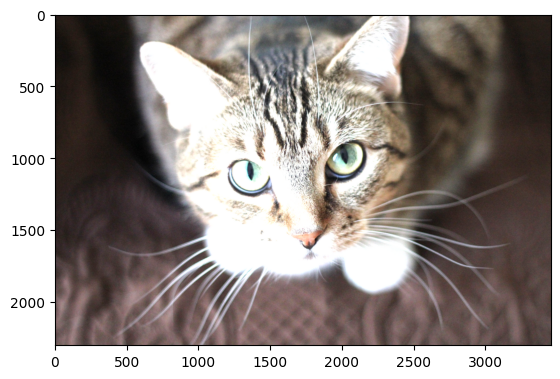

In [18]:
img = pil_to_tensor(image_pil)
magnitude = 1.5
img = adjust_brightness(img, 1.5)
import matplotlib.pyplot as plt
numpy_image = np.transpose(img, (1, 2, 0))
plt.imshow(numpy_image)
plt.show()

In [19]:
def test_adjust_brightness():
    x_shape = [2, 2, 3]
    x_data = [0, 5, 13, 54, 135, 226, 37, 8, 234, 90, 255, 1]
    x_np = np.array(x_data, dtype=np.uint8).reshape(x_shape)
    x_pil = Image.fromarray(x_np, mode="RGB")
    x_pil = pil_to_tensor(x_pil)

    # test 0
    y_pil = adjust_brightness(x_pil, 1)
    y_np = np.array(y_pil)
    torch.testing.assert_close(y_np, x_pil.numpy())

    # test 1
    y_pil = adjust_brightness(x_pil, 0.5)
    y_np = np.array(y_pil)
    y_ans = np.array([[[0, 27], [18, 45]], [[2, 67], [4, 127]], [[6, 113], [117, 0]]], dtype=np.uint8)
    torch.testing.assert_close(y_np, y_ans)

    # test 2
    y_pil = adjust_brightness(x_pil, 2)
    y_np = np.array(y_pil)
    y_ans = np.array([[[  0, 108], [ 74, 180]], [[ 10, 255], [ 16, 255]], [[ 26, 255], [255, 2]]], dtype=np.uint8)
    torch.testing.assert_close(y_np, y_ans)

    print('All test cases passed')

test_adjust_brightness()

All test cases passed


**Kết quả mong đợi**

All test cases passed


# Lập trình hàm đảo ngược ảnh

Hàm `invert` nhận đối số là một tensor `img` và trả về một tensor mới trong đó mỗi phần tử được tính bằng cách trừ giá trị biểu diễn tối đa _max_value cho từng giá trị pixel của ảnh. Hàm được định nghĩa với chữ ký như sau:



In [20]:
def invert(img: Tensor) -> Tensor:
    # TODO 6: Lập trình như giải thích bên trên
    max_value = _max_value(img.dtype)
    out = max_value - img

    return out

In [21]:
def test_invert_function():
    # Test with a simple example
    input_tensor = torch.tensor([1, 2, 3], dtype=torch.uint8)
    expected_output = torch.tensor([254, 253, 252], dtype=torch.uint8)
    actual_output = invert(input_tensor)
    assert torch.equal(actual_output, expected_output)

    # Test with a larger tensor
    input_tensor = torch.tensor([10, 20, 30, 40], dtype=torch.uint8)
    expected_output = torch.tensor([245, 235, 225, 215], dtype=torch.uint8)
    actual_output = invert(input_tensor)
    assert torch.equal(actual_output, expected_output)

    print('All test cases passed')

test_invert_function()

All test cases passed


**Kết quả mong đợi**

All test cases passed


Hiển thị ảnh sau khi đảo ngược

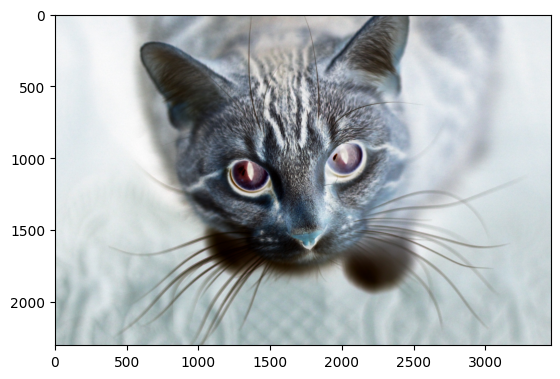

In [22]:
img = pil_to_tensor(image_pil)
inverted_img = invert(img)
numpy_inverted_image = np.transpose(inverted_img, (1, 2, 0))
plt.imshow(numpy_inverted_image)
plt.show()